**Dataset Attributes:**

country : Name of the country

child_mort : Death of children under 5 years of age per 1000 live births

exports : Exports of goods and services per capita. Given as %age of the GDP per capita

health : Total health spending per capita. Given as %age of GDP per capita

imports : Imports of goods and services per capita. Given as %age of the GDP per capita

Income : Net income per person

Inflation : The measurement of the annual growth rate of the Total GDP

life_expec : The average number of years a new born child would live if the current mortality patterns are to remain the same

total_fer : The number of children that would be born to each woman if the current age-fertility rates remain the same.

gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population.

# Import & initialize

In [446]:
import numpy as np 
import pandas as pd
import matplotlib .pyplot as plt 
%matplotlib inline
import seaborn as sns
from fcmeans import FCM
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [447]:
# Import Data
data = pd.read_csv('CountryData.csv')

In [448]:
# check CountryData.csv row & column
data.shape

(167, 10)

In [449]:
pd.DataFrame(data)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# Discovery some information

In [450]:
#Summary statistics of the dataset
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [451]:
#Check for missing values
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [452]:
#Check data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [453]:
# Show the name of columns
columns = data.columns
columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

# Data Preparation & Processing

In [454]:
print(data.shape)
pd.DataFrame(data)

(167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [455]:
# Drop the column 'country'  and save to data1
data1 = data.drop(['country'], axis = 1)

In [456]:
print(data1.shape)
pd.DataFrame(data1)

(167, 9)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


#### Correlation Matrix

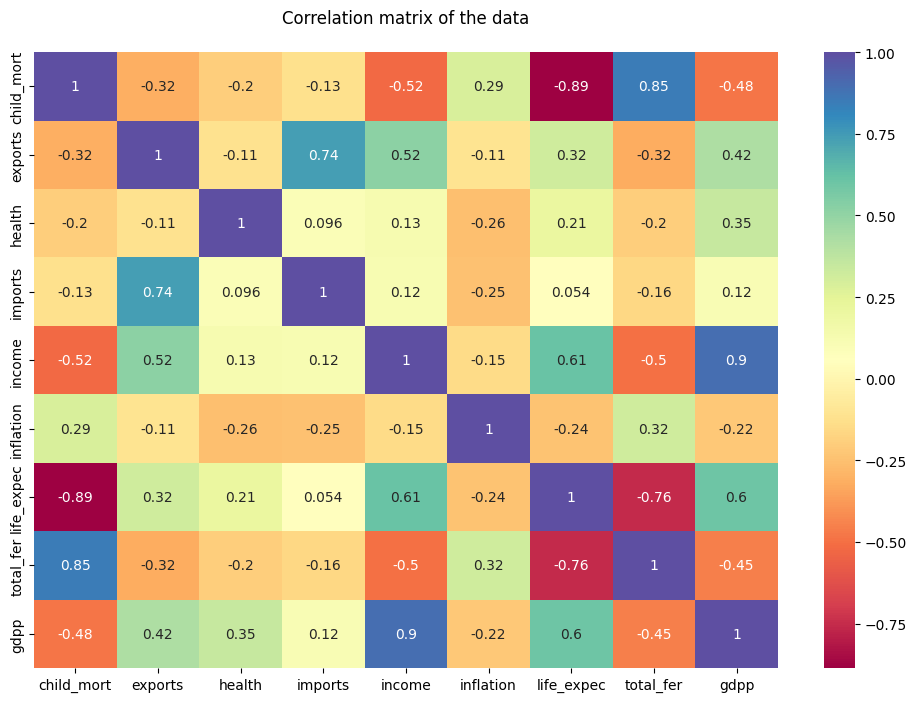

In [457]:
# Correlation Matrix

plt.figure(figsize = (12,8))
hm = sns.heatmap(data1.corr(), cmap= 'Spectral',annot = True )
hm.set(title = "Correlation matrix of the data\n")
plt.show()

#### Data Distribution of each column

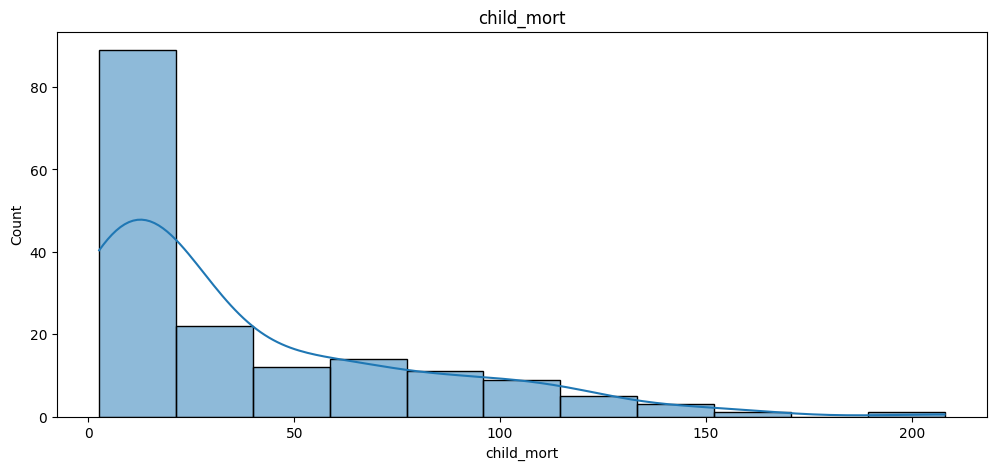

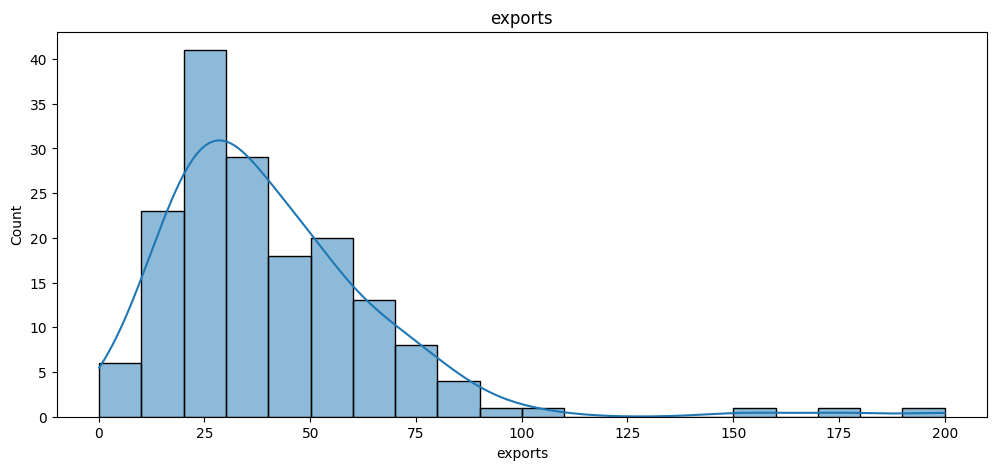

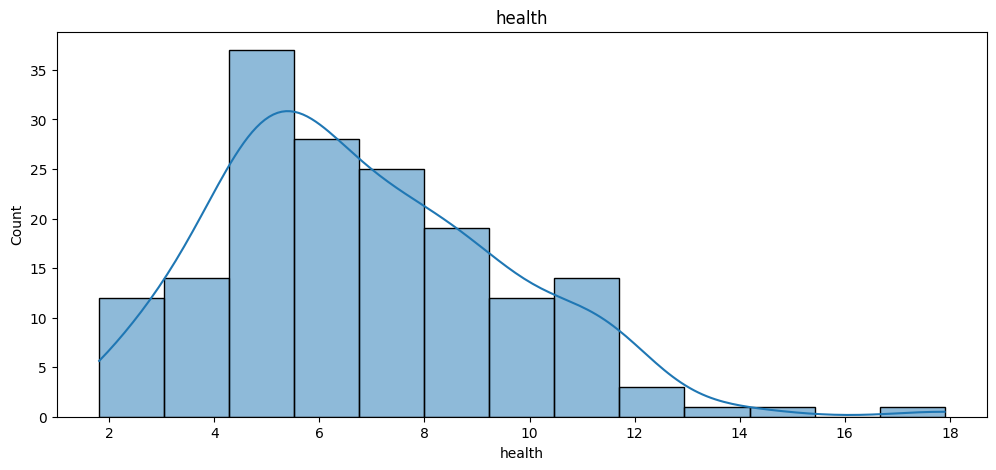

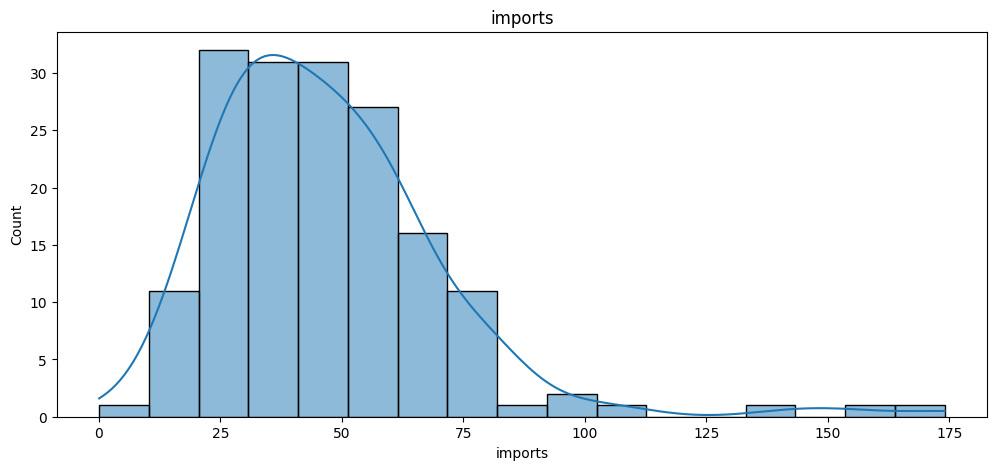

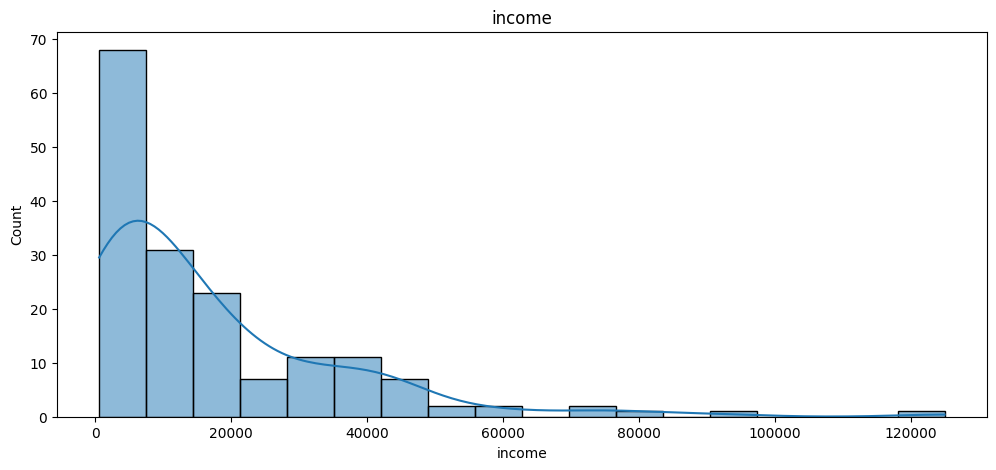

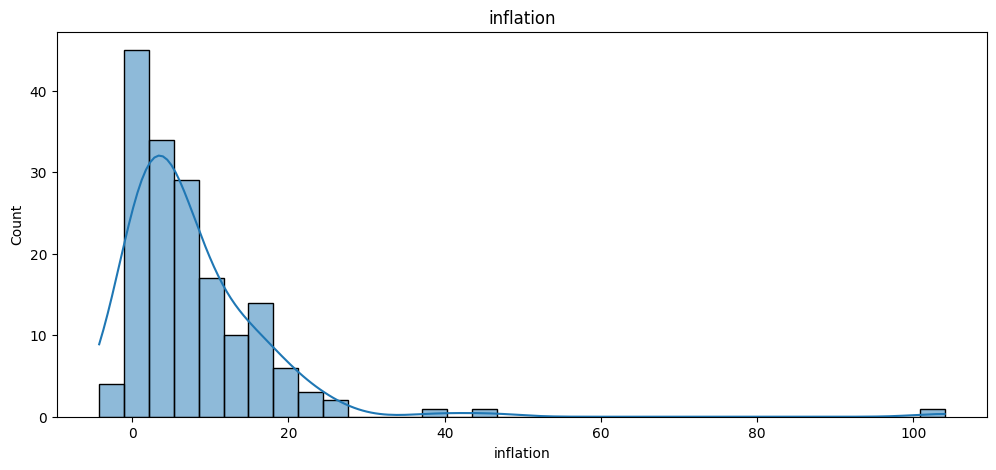

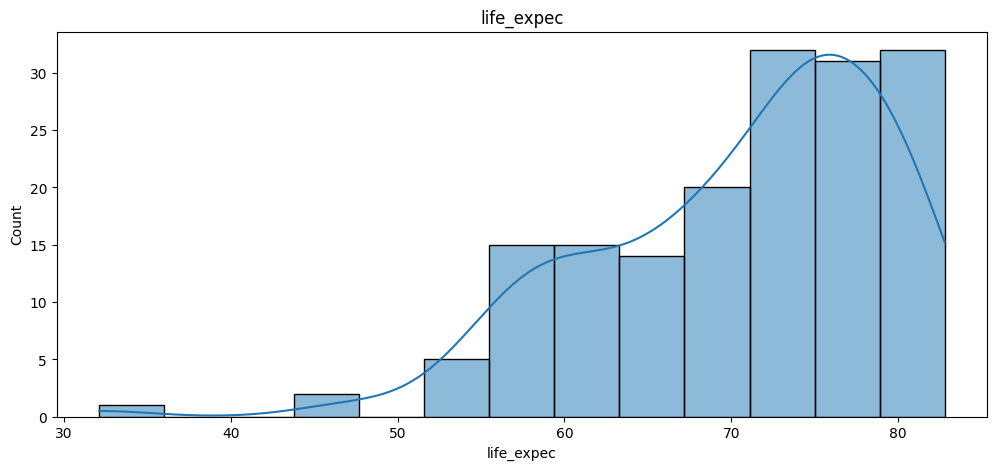

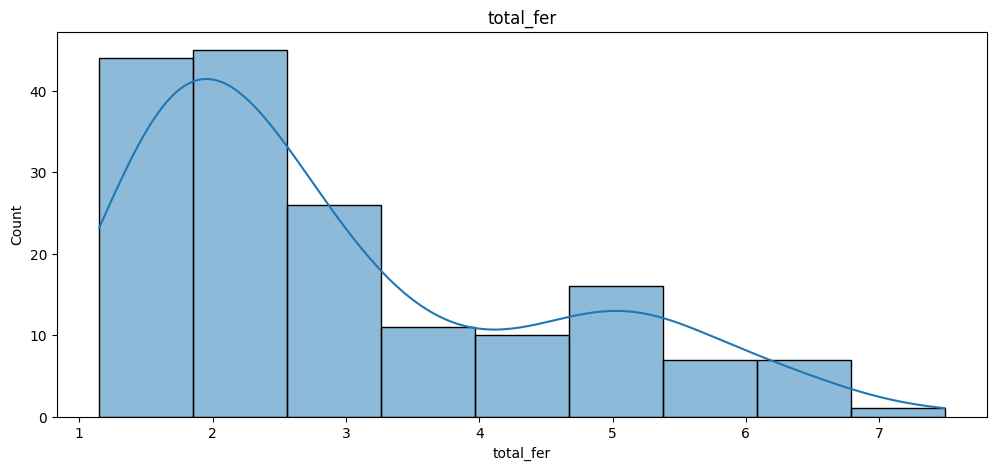

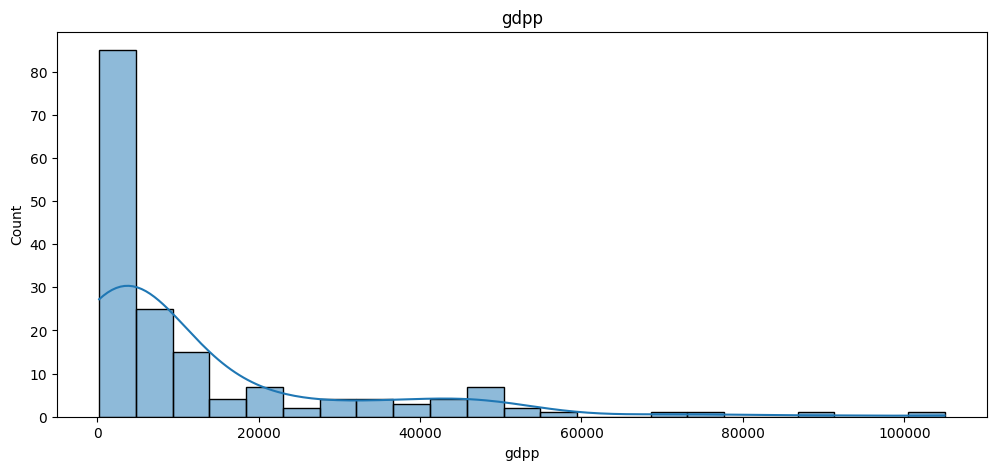

In [458]:
# Visualize the histograms of each attribute
attributes = data1.columns
for attribute in attributes:
    plt.figure(figsize=(12, 5))
    plt.title(attribute)
    sns.histplot(data[attribute], kde=True)
    plt.show()

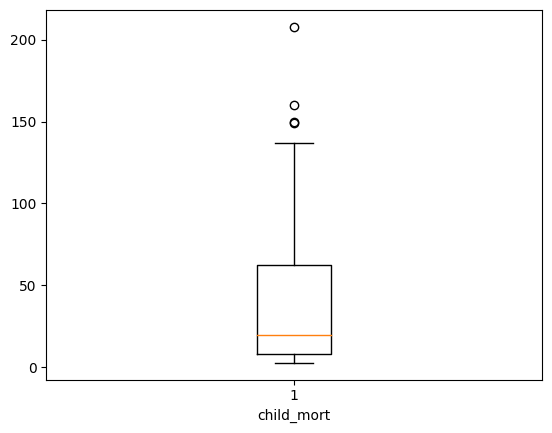

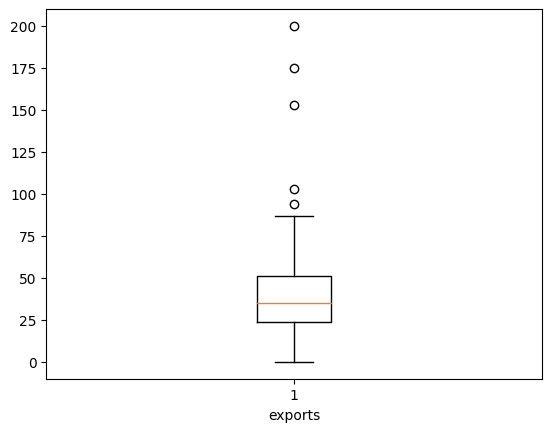

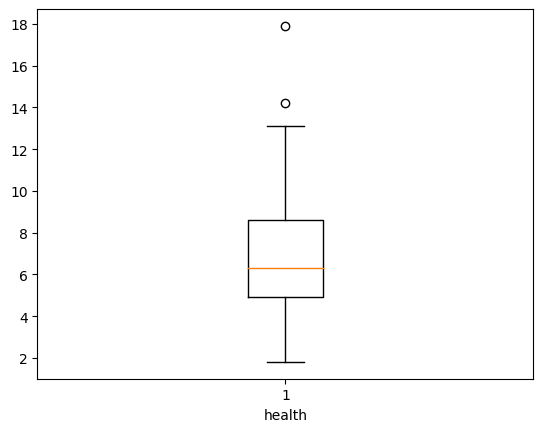

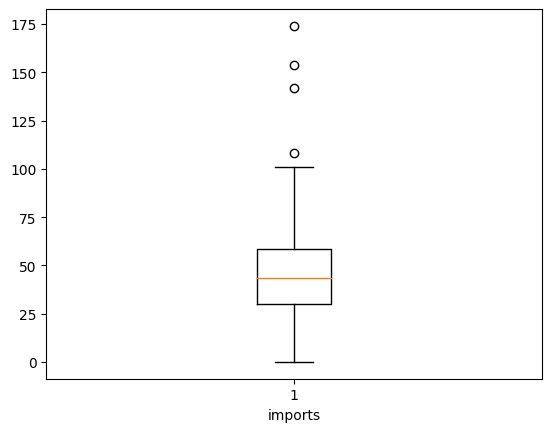

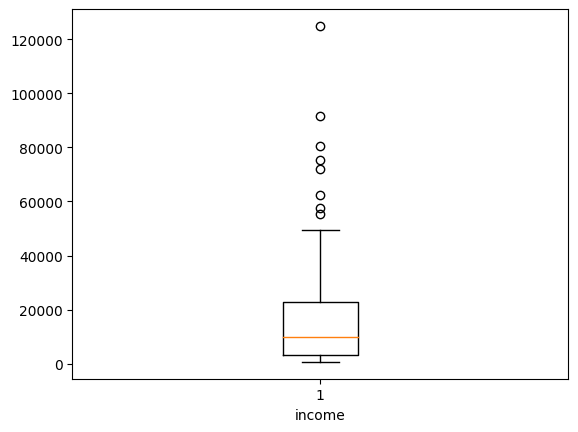

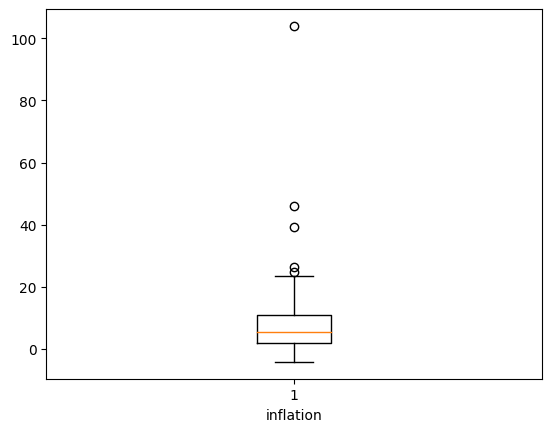

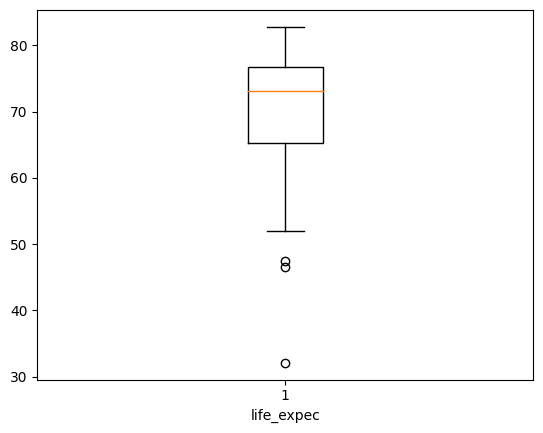

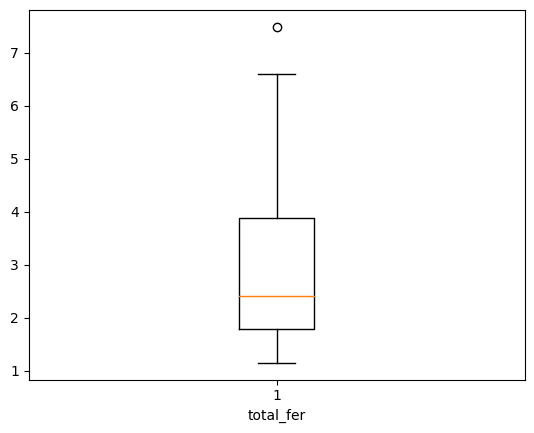

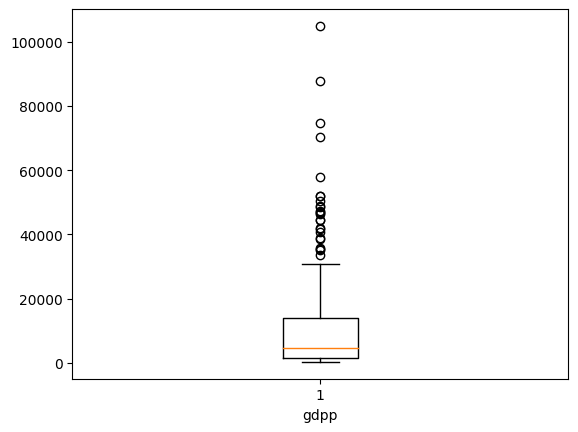

In [459]:
# Detect outliers using box plots
for attribute in data1.columns:
    plt.boxplot(data1[attribute])
    plt.xlabel(attribute)
    plt.show()

Outliers or noise form dataset no need to remove. Becuse all numbers are possible in the real world. 

# Modelling

In [460]:
# Show the name of columns
columns = data1.columns
columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

#### Scaling Data

In [461]:
#columns should be normalized before modeling
scalarModel = StandardScaler()
data1 = scalarModel.fit_transform(data1)
data1

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [462]:
# Converting the normalized data to data frame
data1 = pd.DataFrame(data1 , columns = columns )
data1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [463]:
#Converting the DataFrame to a NumPy array 
data1 = data1.values
data1

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

#### Apply Fuzzy C Means Algorithm

In [464]:
fcmModel = FCM(n_clusters = 2)  #indicating the desired number of clusters.k=2
fcmModel.fit(data1)
center = fcmModel.centers
center

array([[ 0.72565255, -0.28819547, -0.29047455, -0.13511708, -0.49097343,
         0.21483348, -0.72948659,  0.77281593, -0.44991527],
       [-0.57001891,  0.19820928,  0.26601033,  0.07662457,  0.38230953,
        -0.25066969,  0.58938064, -0.59800168,  0.36961954]])

In [465]:
# Predict the cluster for each data point
pred = fcmModel.predict(data1)
print('Predicted Value for fcmModel is : ' , pred)
pred.shape

Predicted Value for fcmModel is :  [0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1
 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1
 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0
 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0]


(167,)

# Result Analytics

In [466]:
# add the cluster column to the dataframe 
data['cluster'] = pred
pd.DataFrame(data)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


#### Draw the data and Cluster

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


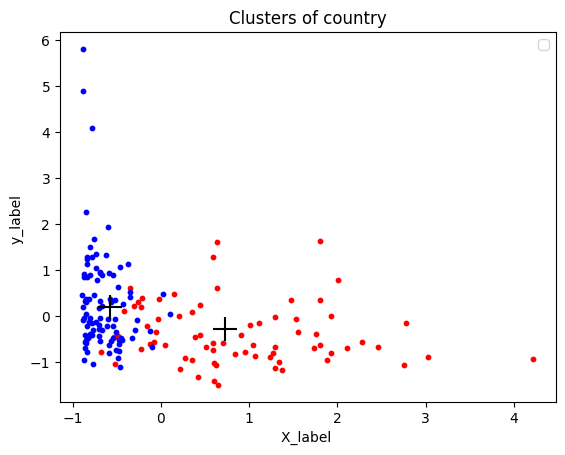

In [467]:
# Visualising the clusters
plt.scatter(data1[pred == 0, 0], data1[pred == 0, 1], s = 10, c = 'r')    #cluster0 red
plt.scatter(data1[pred == 1, 0], data1[pred == 1, 1], s = 10, c = 'b' )   #cluster1 blue
#plt.scatter(data1[pred == 2, 0], data1[pred == 2, 1], s = 10, c = 'g' )   #cluster2 green
plt.scatter(center[:, 0], center[:, 1], s = 300, c = 'black',marker = '+')
plt.title('Clusters of country')
plt.xlabel('X_label ')
plt.ylabel('y_label ')
plt.legend()
plt.show()

In [468]:
# Calculate cluster means 
clusterMean = data.groupby(pred).mean()
clusterMean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,73.069444,30.605542,5.987917,43.137026,4721.847222,11.765903,62.408333,4.306667,2274.361111,0.0
1,11.895789,49.069474,7.443053,49.734737,26559.894737,4.762326,76.730526,1.918211,21065.894737,1.0


In [469]:
# Identify clusters with lower values for indicators
clusters_in_need = clusterMean[
    (clusterMean['child_mort'] > clusterMean['child_mort'].mean()) &
    (clusterMean['income'] < clusterMean['income'].mean()) &
    (clusterMean['gdpp'] < clusterMean['gdpp'].mean()) &
    (clusterMean['life_expec'] < clusterMean['life_expec'].mean())
]

In [470]:

# Create DataFrame with country names and cluster labels
countryClusters = pd.DataFrame({'country': data['country'], 'cluster': pred})

# Identify countries in need of aid
countryNeedAid = countries_clusters[countryClusters['cluster'].isin(countryNeedAid.index)]


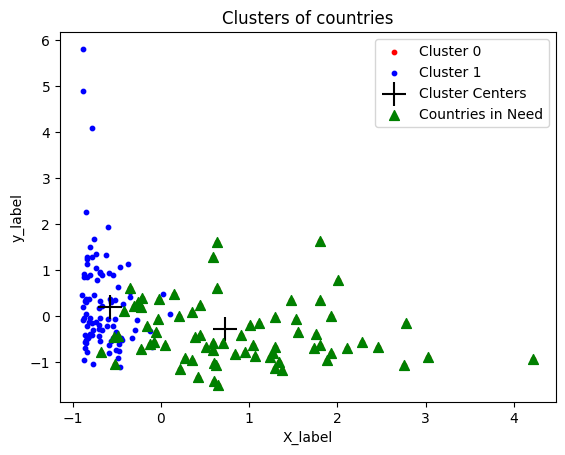

Countries in Need of Aid:
         country  cluster
0    Afghanistan        1
3         Angola        1
12    Bangladesh        1
17         Benin        1
19       Bolivia        1
..           ...      ...
161   Uzbekistan        1
162      Vanuatu        1
163    Venezuela        1
165        Yemen        1
166       Zambia        1

[72 rows x 2 columns]


In [471]:
# Visualizing the clusters and countries in need
plt.scatter(data1[pred == 0, 0], data1[pred == 0, 1], s=10, c='r')  # cluster 0
plt.scatter(data1[pred == 1, 0], data1[pred == 1, 1], s=10, c='b')  # cluster 1
plt.scatter(center[:, 0], center[:, 1], s=300, c='black', marker='+')
plt.scatter(data1[countryNeedAid.index, 0], data1[countryNeedAid.index, 1], s=50, c='g', marker='^')  # countries in need
plt.title('Clusters of countries')
plt.xlabel('X_label')
plt.ylabel('y_label')
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster Centers', 'Countries in Need'])
plt.show()

# Display countries in need of aid
print("Countries in Need of Aid:")
print(countryNeedAid)

In [472]:
# List countries in need of aid
countries_need_help = countryNeedAid['country'].tolist()

# Display countries in need of aid
print("Countries in Need of Aid:")
for country in countries_need_help:
    print(country)

Countries in Need of Aid:
Afghanistan
Angola
Bangladesh
Benin
Bolivia
Botswana
Burkina Faso
Burundi
Cambodia
Cameroon
Central African Republic
Chad
Comoros
Congo, Dem. Rep.
Congo, Rep.
Cote d'Ivoire
Egypt
Equatorial Guinea
Eritrea
Fiji
Gabon
Gambia
Ghana
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
India
Indonesia
Iraq
Kazakhstan
Kenya
Kiribati
Kyrgyz Republic
Lao
Lesotho
Liberia
Madagascar
Malawi
Mali
Mauritania
Micronesia, Fed. Sts.
Mongolia
Mozambique
Myanmar
Namibia
Nepal
Niger
Nigeria
Pakistan
Philippines
Rwanda
Samoa
Senegal
Sierra Leone
Solomon Islands
South Africa
Sri Lanka
Sudan
Tajikistan
Tanzania
Timor-Leste
Togo
Tonga
Turkmenistan
Uganda
Uzbekistan
Vanuatu
Venezuela
Yemen
Zambia
